In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
import pandas as pd

# Logistic Regression
Binary Logistic Regression: A classification model that can separate the data into two classes 0/1.


# The Perceptron
<img src="pics/perc.png">

The neural unit froms a linear combination of the input $x$: $z=w\cdot x+b$, which is passed into a non-linear activation function, e.g. the sigmoid: $\sigma(z)=\frac{1}{1+\exp^{-z}}$

Therefore, the logistic regression model looks like:
$$f_{\mathbf{w},b}(x) = \frac{1}{1+\exp^{-(\mathbf{w}\cdot x+b)}}$$

By looking at the graph of the sigmoid function you can see how well it fits the purpose in classification. It squashes $z$ onto the the domain (0,1). If we weights $\mathbf{w}$ and $b$ are optimised appropriately, we can interpret the output of $f(\mathbf{x})$ as the probability of $y_i$ being positive. For example, if it's higher than or equal to the threshold 0.5 we could say that the class of $x$ is positive; otherwise it is negative.

In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

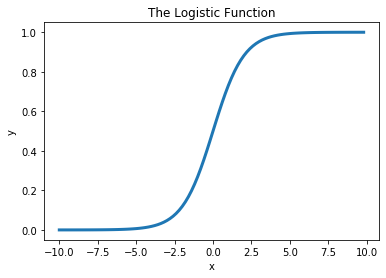

In [3]:
x = np.arange(-10., 10., 0.2)
y = list(map(sigmoid, x))
plt.title('The Logistic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y, linewidth=3)

## The Data
We construct a synthetic data set for which a closed form solution of the logistic regression model exists
* two classes 0/1
* the data follows a bivariate Gaussian distribution
* the marginals have the same variance and off-diagonal elements of the covariance matrix are zero (Naive Bayes)

Recap: Normal distribution of one random variable $x$ with standard deviation $\sigma$ (variance $\sigma^2$) and mean $\mu$: 
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

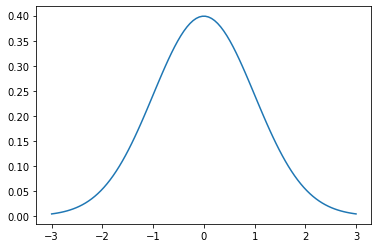

In [4]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x, stats.norm.pdf(x, mu, sigma))

The multivariate Gaussian distribution is a generalization of the one-dimensional (univariate) normal distribution. pdf:
$$p(\mathbf{X})=\frac{1}{\sqrt{\left(2\pi\right)^D|\mathbf{\Sigma}|}}\exp^{-\frac{1}{2}\left(\mathbf{X}-\mathbf{\mu}\right)^T\mathbf{\Sigma}^{-1}\left(\mathbf{X}-\mathbf{\mu}\right)}$$

with a $D$-dimensional random vector $\mathbf{X} = (X_1,\ldots,X_k)^{\mathrm T}$

the $D$-dimensional mean vector:
$$ \boldsymbol\mu = \operatorname{E}[\mathbf{X}] = ( \operatorname{E}[X_1], \operatorname{E}[X_2], \ldots, \operatorname{E}[X_k] )$$
and the $D \times D$ covariance matrix
$$\Sigma_{i,j} = \operatorname{E} [(X_i - \mu_i)( X_j - \mu_j)] = \operatorname{Cov}[X_i, X_j]$$

such that $1 \le i,j \le D.$ The inverse of the covariance matrix $\boldsymbol\Sigma^{-1}$ is called concentration matrix or precision matrix.

For your input data we now construct a multivariate normal distribution from two marginal distributions (class 0 and 1): One Gaussian centered at $\mu_0=(-2,-2)^T$, the other centered at $\mu_1=(2,2)^T$. Both have the same covariance $\Sigma=\begin{pmatrix}1 & 0\\ 0 & 1\end{pmatrix}$

$N$: total number of samples/data points  
$D$: number of features  

Equal number of samples per class

In [5]:
N = 100 # number of samples
D = 2 # number of features

In [6]:
# X = np.random.randn(N,D)
# X[:50, :] = X[:50,:] - 2*np.ones((50,D))
# X[50:, :] = X[50:, :] + 2*np.ones((50,D))

N_0 = int(N/2) # number of samples for class 0
N_1 = int(N/2) # number of samples for class 1

mu_0 = [-2,-2]
variance = 1

mu_1 = [2,2]

m_cov = [[variance, 0],
         [0, variance]]

In [7]:
np.random.seed(41) # make the results reproducible
X = np.concatenate([np.random.multivariate_normal(mu_0, m_cov, N_0),
                    np.random.multivariate_normal(mu_1, m_cov, N_1)],
                   axis=0)
X.shape

(100, 2)

The target labels:

In [8]:
T = np.array([0]*N_0 + [1]*N_1)

In [9]:
df = pd.DataFrame(X, columns=['x', 'y',])
df['class'] = T

In [10]:
# in a separate module to avoid distraction
from lreg_helpers import multivariateGrid

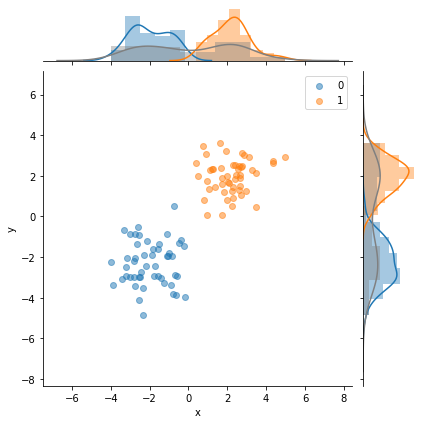

In [11]:
multivariateGrid('x', 'y', 'class', df=df)

## Implementation of the Feed-Forward Pass
$\mathbf{Y}_{N\times 1}=\sigma\left(\mathbf{X}_{N\times D}\cdot \mathbf{W}_{D\times 1}+b_{N\times 1}\right)$ with the sigmoid applied element-wise

equivalent to incorporating $b$ in the weights and adding a columns of ones to $\mathbf{X}$: 
$\mathbf{Y}_{N\times 1}=\sigma\left(\left[\overline{1}, \mathbf{X}\right]_{N\times D+1}\cdot \left[b,w_1,...,w_D\right]_{D+1\times 1}\right)$

In [12]:
ones = np.array([[1]*N]).T
ones.shape

(100, 1)

In [13]:
Xb = np.concatenate((ones, X), axis=1)
Xb.shape

(100, 3)

Initialise the weights vector randomly from a normal distribution

In [14]:
W = np.random.randn(D + 1) # the first element is the bias term b

Calculate the dot product between each row of X with the weights vector:

In [15]:
Z = Xb.dot(W)
Z.shape

(100,)

Apply sigmoid to each element in $\mathbf{Z}$

In [16]:
Y = sigmoid(Z)
Y.shape

(100,)

We get an $N$ dimensional output vector, each value between 0 and 1

In [17]:
Y

array([0.07857417, 0.13416845, 0.16394872, 0.07200735, 0.05607329,
       0.08414536, 0.0598706 , 0.03847981, 0.046371  , 0.18841081,
       0.04184845, 0.10942109, 0.26489916, 0.12220989, 0.23382576,
       0.16089043, 0.05494789, 0.23304133, 0.10875319, 0.07219884,
       0.0993317 , 0.08565297, 0.15930237, 0.19434353, 0.06516812,
       0.15051165, 0.09518452, 0.11129435, 0.08463558, 0.02894559,
       0.35553072, 0.28862635, 0.05029387, 0.24876496, 0.12222981,
       0.18098627, 0.11079519, 0.1553117 , 0.14579836, 0.04663735,
       0.11208699, 0.09478097, 0.03039886, 0.05188205, 0.088893  ,
       0.22461426, 0.0528192 , 0.0456811 , 0.18944049, 0.06106788,
       0.13448393, 0.28535174, 0.22265529, 0.37425162, 0.3918355 ,
       0.42537114, 0.45725173, 0.36663913, 0.31244761, 0.30350377,
       0.21381565, 0.16477995, 0.43272193, 0.37707742, 0.67822103,
       0.46198705, 0.2133897 , 0.53316562, 0.3606359 , 0.40693073,
       0.66913562, 0.41950465, 0.42598303, 0.41754496, 0.40905

In [19]:
pred = np.round(Y)
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0.]


## The Loss Function
The optimization criterion in logistic regression is called maximum likelihood. We maximise the likelihood of the observations in the training set according to the model.

Consider a ($D$-dimensional) training example $\mathbf{x}_{n}$ and the corresponding target value $t_{n}$ (binary: 0 or 1). Applying the logistic regression model to $\mathbf{x}_{n}$ 

$$y_n = f_{\mathbf{w},b}(\mathbf{x}_n)$$

yields a value $0<y_n<1$. If $t_n$ is 1, the likelihood of $t_n$ being the positive class, according to our model, is given by $y_n$. Similarly, if $t_n$ is 0, the likelihood of it being the class 0 is given by $1-y_n$.

the likelihood of the training data according to our model
$$L_{\mathbf{w}, b} \stackrel{\text{def}}{=} \prod_{n=1}^N y_n^{t_n}(1-y_n)^{1-t_n}$$
$y_n$ when $t_n=1$ and $1-y_n$ otherwise.

The log-likelihood is more practical (e.g. numerical underflow and we can consider contributions from all samples $N$, even if we predict 1 for $t_n=0$ and 0 for $t_n=1$ for some):

$$\log L_{\mathbf{w},b} \stackrel{\text{def}}{=} \ln \left(L_{\mathbf{w},b}\left(\mathbf{x}_n\right)\right)=\sum_{n=1}^N \left[t_n \ln y_n +(1-t_n) \ln(1-y_n) \right]$$

if $t_n=1$ only first term matters, if $t_n=0$ only second term matters

$\ln y \rightarrow$ number between $0$ and $-\inf$

* $t_n=1,\; y_n=1 \; \rightarrow \; 0$
* $t_n=0,\; y_n=0 \; \rightarrow \; 0$
* $t_n=1\; y_n=0.9 \; \text{(very close)} \; \rightarrow \; 0.11$
* $t_n=1,\; y_n=0.5 \; \text{(right on the decision boundary)} \; \rightarrow \; 0.69$
* $t_n=1,\; y_n=0.1 \; \text{(very wrong)} \; \rightarrow \; 2.3$

Correspondingly, we can also minimise the negative of the log-likelihood, which is called the log-likelihood error or cross-entropy error.

$$J \stackrel{\text{def}}{=} - \sum_{n=1}^N \left[t_n \ln y_n +(1-t_n) \ln(1-y_n) \right]$$

In [18]:
def cross_entropy(T, Y):
    E = 0
    for n in range(N): # sum over all the samples
        if T[n] == 1:
            E -= np.log(Y[n])
        else:
            E -= np.log(1 - Y[n])
    return E

Calculate the cross-entropy error of the outputs that were generated above with the randomly chosen weights:

In [19]:
cross_entropy(T,Y)

57.835657891702766

# The Closed Form Solution
Logistic regression is about finding the hyperplance that separates the (in this case 2) groups.  
If the data follows a bivariate Gaussian distribution with equal covariance of the two marginals we can use Bayes' method to find an analytical solution for the optimal weights.

Bayes' Theorem:
$$p(Y|X)=\frac{p(x|Y)p(Y)}{p(X)}$$
The posterior $p(Y|X)$ (the probability of observing $Y$ given $X$) is equal to  the likelihood $p(X|Y)$ times the prior $p(Y)$ in relation to $p(X)$.  
$p(X|Y)$ is the Gaussian - we calculate it over all the data that belongs to class $Y$. $p(Y)$ can be estimated from the frequency class $Y$ appears in the data.

Rearrange Bayes' rule for $p(X)$
$$\begin{aligned}
p(X) &=\frac{p(X|Y=0)p(Y=0)}{p(Y=0|X)}\\
p(Y=0|X) p(X) &= p(X|Y=0)p(Y=0)
\end{aligned}$$
and
$$\begin{aligned}
p(X) &=\frac{p(X|Y=1)p(Y=1)}{p(Y=1|X)}\\
p(Y=1|X) p(X) &= p(X|Y=1)p(Y=1)
\end{aligned}$$

add them up and realise that $p(Y=0|X)+p(Y=1|X) = 1$

$$p(X)=p(X|Y=0)p(Y=0)+p(X|Y=1)p(Y=1)$$

Now insert the positive class $Y=1$ and the expression for $p(X)$ into Bayes' rule: 

$$p(Y=1|X)=\frac{p(x|Y=1)p(Y=1)}{p(X|Y=0)p(Y=0)+p(X|Y=1)p(Y=1)}$$

divide top and bottom by $p(X|Y=1)p(Y=1)$

$$p(Y=1|X)=\frac{1}{1+\frac{p(X|Y=0)p(Y=0)}{p(X|Y=1)p(Y=1)}}$$

This now looks very similar to the sigmoid, therefore

$$\begin{aligned}
-\mathbf{X}\mathbf{W}+b &= \ln\left(\frac{p(X|Y=0)p(Y=0)}{p(X|Y=1)p(Y=1)}\right)\\
&= \ln p(X|Y=0) - \ln p(X|Y=1) + \ln \frac{p(Y=0)}{p(Y=1)}
\end{aligned}$$

insert the Gaussians for the two likelihood marginals and simplify

$$\begin{aligned}
=& \ln \frac{1}{\sqrt{\left(2\pi\right)^k|\mathbf{\Sigma}|}}\exp^{-\frac{1}{2}\left(\mathbf{X}-\mathbf{\mu}_0\right)^T\mathbf{\Sigma}^{-1}\left(\mathbf{X}-\mu_0\right)} - \ln \frac{1}{\sqrt{\left(2\pi\right)^k|\mathbf{\Sigma}|}}\exp^{-\frac{1}{2}\left(\mathbf{X}-\mu_1\right)^T\mathbf{\Sigma}^{-1}\left(\mathbf{X}-\mu_1\right)} + \ln \frac{p(Y=0)}{p(Y=1)}\\
=& -\frac{1}{2}\left(\mathbf{X}^T\mathbf{\Sigma}^{-1}\mathbf{X}-\mathbf{X}^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_0-\mathbf{\mu}_0^T\mathbf{\Sigma}^{-1}\mathbf{X}+\mathbf{\mu}_0^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_0\right)\\
& + \frac{1}{2}\left(\mathbf{X}^T\mathbf{\Sigma}^{-1}\mathbf{X}-\mathbf{X}^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_1-\mathbf{\mu}_1^T\mathbf{\Sigma}^{-1}\mathbf{X}+\mathbf{\mu}_1^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_1 \right)\\
& + \ln \frac{p(Y=0)}{p(Y=1)}
\end{aligned}$$

The terms quadratic in $X$ cancel out and since the covariance matrix, and hence its inverse, is symmetric: $\mathbf{X}^T\mathbf{\Sigma}^{-1}\mathbf{\mu}=\mathbf{\mu}^T\mathbf{\Sigma}^{-1}\mathbf{X}$

$$-\mathbf{X}\mathbf{W}+b = (\mu_0^T-\mu_1^T)\mathbf{\Sigma}^{-1}\mathbf{X} - \frac{1}{2}\mu_0^T\mathbf{\Sigma}^{-1}\mu_0+\frac{1}{2}\mu_1^T\mathbf{\Sigma}^{-1}\mu_1 + \ln \frac{p(Y=0)}{p(Y=1)}$$

Finally

$$\mathbf{W} = (\mu_1^T-\mu_0^T)\mathbf{\Sigma}^{-1}$$
$$b = \frac{1}{2}\mu_0^T\mathbf{\Sigma}^{-1}\mu_0-\frac{1}{2}\mu_1^T\mathbf{\Sigma}^{-1}\mu_1 - \ln \frac{p(Y=0)}{p(Y=1)}$$

plug in $\mu_0=(-2,-2)^T$, $\mu_1=(2,2)^T$ and $\Sigma=\begin{pmatrix}1 & 0\\ 0 & 1\end{pmatrix}$. Both classes have an equal amount of samples ($\rightarrow \ln(1)=0$)

$\rightarrow b=0, \mathbf{W} = (4,4)$

In [20]:
w_cf = np.array([0, 4, 4])

Calculate the cross entropy error of the outputs generated with the weights according to the closed-form solution:

In [21]:
Y_cf = sigmoid(Xb.dot(w_cf))
cross_entropy(T, Y_cf)

0.3439512090041786

And compare with the result above from the randomly chosen weights!

We can now use the weights to identify the decision boundary that separates classes 0 and 1: It is the line where $p(Y=0) = p(Y=1) = 0.5$
$$p(Y=1) = \frac{1}{1+\exp^{-XW+b}} \; \rightarrow \; -XW+b = 0$$
Insert the optimal weights

$$1\cdot 0+x_1 \cdot 4+ x_2 \cdot 4=0 \; \rightarrow \; x_2=-x_1$$

We can add this line in the plot:

In [22]:
x_line = np.linspace(-6, 6, 100)

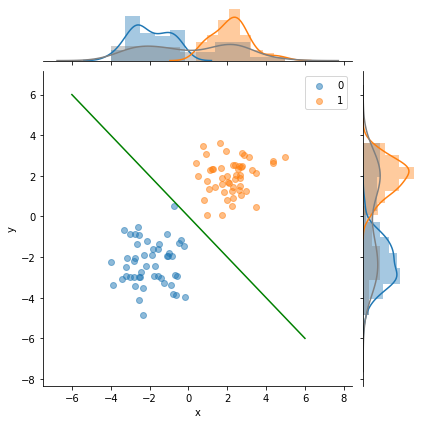

In [24]:
multivariateGrid('x', 'y', 'class', df=df, line=np.array([x_line, -x_line]))

# Gradient Descent
Optimise the weights numerically and see how close we get to the closed-form solution.

$$J \stackrel{\text{def}}{=} - \sum_{n=1}^N \left[t_n \ln y_n +(1-t_n) \ln(1-y_n) \right]$$

Use the chain rule to calculate the partial derivative of the cross entropy loss with respect to the individual weights $w_i$:

$$\frac{\partial J}{\partial w_i} = \sum_{n=1}^N \frac{\partial J}{\partial y_n} \frac{\partial y_n}{\partial z_n} \frac{\partial z_n}{\partial w_i}$$

$$\frac{\partial J}{\partial y_n} = - t_n \frac{1}{y_n} - (1-t_n) \frac{1}{1-y_n} (-1)$$

remainder: $y_n = \frac{1}{1+\exp^{-\mathbf{z_n}}}$

$$\begin{aligned}
\frac{\partial y_n}{\partial z_n} &= \frac{-1}{(1+\exp^{-\mathbf{z_n}})^2}(\exp^{-z})(-1)\\
&= y_n \frac{\exp^{-z}}{1+\exp^{-z}}\\
&= y_n \frac{1+\exp^{-z}-1}{1+\exp^{-z}}\\
&= y_n \left( \frac{1+\exp^{-z}}{1+\exp^{-z}} - \frac{1}{1+\exp^{-z}} \right)\\
&= y_n (1-y_n)\\
\end{aligned}$$

remainder: $z_n = w_0 x_{n,0} + w_1 x_{n,1} + w_2 x_{n,2} + ...$

$$\frac{\partial z_n}{\partial w_i}= x_{n,i}$$

Putting it all together:

$$\begin{aligned}
\frac{\partial J}{\partial w_i} &= -\sum_{n=1}^N t_n \frac{1}{y_n} y_n (1-y_n) x_{n,i} - (1-t_n) \frac{1}{1-y_n} y_n (1-y_n) x_{n,i}\\
&= -\sum_{n=1}^N t_n (1-y_n) x_{n,i} - (1-t_n) y_n x_{n,i}\\
&= \sum_{n=1}^N (y_n - t_n) x_{n,i}\\
\end{aligned}$$

This can be expressed in vector form:

$$\begin{aligned}
\frac{\partial J}{\partial \mathbf{W}} &= \sum_{n=1}^N (y_n - t_n) \mathbf{X}_{n}\\
&= \mathbf{X}^T \left(\mathbf{Y}-\mathbf{T}\right) \; \rightarrow \text{shape} D\times 1
\end{aligned}$$

Now we can iteratively
1. calculate the gradient with respect to the weights
2. change the weights by a small factor (the learning rate) along their **negative** gradient (minimise $J$)
3. recalculate $J$ with the updated weights
4. repeat for a fixed number of steps or the weights are considered *converged*

In [25]:
learning_rate = 0.1
N_steps = 100

In [26]:
for i in range(N_steps):
    if i % 5 == 0:
        print(cross_entropy(T, Y))
    W += learning_rate * np.dot((T - Y).T, Xb) # follow the negative gradient!
    Y = sigmoid(Xb.dot(W)) # Calculate the new output based on the updated weights

print(' '.join(['Final weights:', str(W)]))

57.835657891702766
0.28125073934893247
0.2338275678391477
0.19900678945064385
0.17258792274841414
0.15198157270925763
0.1355295173019795
0.12213192567177206
0.11103602827670456
0.10171203937564179
0.09377780753975809
0.08695160141974809
0.08102166628468263
0.0758260779659329
0.0712390941518247
0.06716170872633921
0.06351498751523824
0.06023528324613473
0.057270744473189465
0.05457873108554649
Final weights: [-0.08477172  8.43870486  6.85050627]


low error, but weights far away from closed-form solution! Partially, this is due to the small number of samples. Increasing the amount of training data and regularisation can help. 

## Regularisation
Minimising the objective function $J$ favors large weights ($\rightarrow \; \infty$). This can be partially addressed by adding a penalty term on the L2-norm of the weight vector ($||\mathbf{w}||^2=w^Tw$) to the objective function (also called **ridge regularisation**)

**L2 regularisation**: $$J_{\text{RIDGE}}=J+\lambda ||\mathbf{w}||^2$$

Another form of regularisation tries to set as many weights as possible to zero. This is achieved through adding the L1-norm of the weight vector ($|\mathbf{w}|=\sum_j|w_j|$) (also called **lasso regularisation**) to the objective function:

**L1 regularisation**: $$J_{\text{LASSO}}=J+\lambda |\mathbf{w}|$$
This is particularly useful for large number of features compared to the number of training samples.


## Multiclass and Multilabel
Standard logistic regression is a binary classifier. It can be extended to multinomial distributions with the Softmax activation function. But still, each sample can only belong to one class.

For multiclass-multilabel classification (each sample can be assigned to multiple classes) one binary logistic regression model can be trained per class. Each model is trained on the data belonging to the respective class versus the data belonging to all other classes, it is therefore called one-versus-rest or one-versus-all strategy. This works under the assumption that the individual classes are independent.

Other classifiers are inherently multiclass-multilabel. Decision trees, for example, or Neural Networks with a sigmoid output layer.